
# Project: Tmdb-Movies Analysis!


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 TMDb is an online, open-source database that houses over 10,000 dating back to the 1960s. The originating dataset houses information about movies such as titles, runtimes, and ratings. This data exploration examines movie details as they regard to the aforementioned research questions above


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt      
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


#### 1- General Properties

###I'm using google colab, so i need to mount my drive to acess my data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mydata=pd.read_csv('/content/drive/MyDrive/Downloads/tmdb-movies.csv')
mydata.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [ ]:
# this returns a tuple of the dimensions of the dataframe
mydata.shape

(10866, 21)

In [ ]:
# this returns useful descriptive statistics for each column of data
mydata.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
#### I will drop some features witch I guess, they won't affect my analysis.

In [ ]:
mydata.drop(['imdb_id','cast','homepage','director','tagline','runtime','overview','keywords','release_date'], axis=1 , inplace=True)

In [ ]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   genres                10843 non-null  object 
 6   production_companies  9836 non-null   object 
 7   vote_count            10866 non-null  int64  
 8   vote_average          10866 non-null  float64
 9   release_year          10866 non-null  int64  
 10  budget_adj            10866 non-null  float64
 11  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


In [ ]:
# I want to check my data to decide what i will do
mydata.head(1)

,id,popularity,budget,revenue,original_title,genres,production_companies,vote_count,vote_average,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,1.379999e+08,1.392446e+09


In [ ]:
#Fixing the data type
mydata['budget'] = mydata['budget'].astype(float)
mydata['revenue'] = mydata['revenue'].astype(float)

In [ ]:
mydata.dtypes

id                        int64
popularity              float64
budget                  float64
revenue                 float64
original_title           object
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
budget_adj              float64
revenue_adj             float64
dtype: object

In [ ]:
# which column has a missing values
mydata.columns[mydata.isnull().any()]

Index(['genres', 'production_companies'], dtype='object')

In [ ]:
#sum missing data in rows
sum([True for idx,row in mydata.iterrows() if any(row.isnull())])

1039

In [ ]:
#the missing data are huge and string i cant use mean , but i will drop them
mydata.dropna(inplace=True)


In [ ]:
# check the data for any null
mydata.isnull().sum().any()


False

In [ ]:
#dealing with duplicate data 
mydata.duplicated().sum()

1

In [ ]:
# Drop Duplicate
mydata.drop_duplicates(inplace=True)

In [ ]:
#  Ckeck for duplicate removal
mydata.duplicated().sum()

0

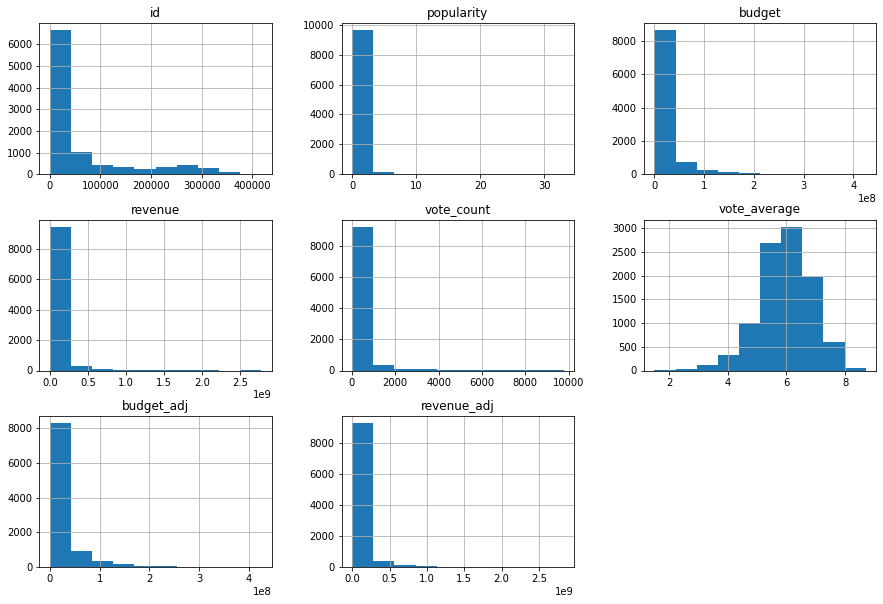

In [ ]:
#drawing a histogram for all the numeric data in my data set
# An over view through all data
mydata.hist(figsize=(15,10));

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What are the most movies genres being produced!)

In [ ]:
# Count top 25 'Genres'
top_25_genres = mydata['genres'].value_counts().nlargest(25)

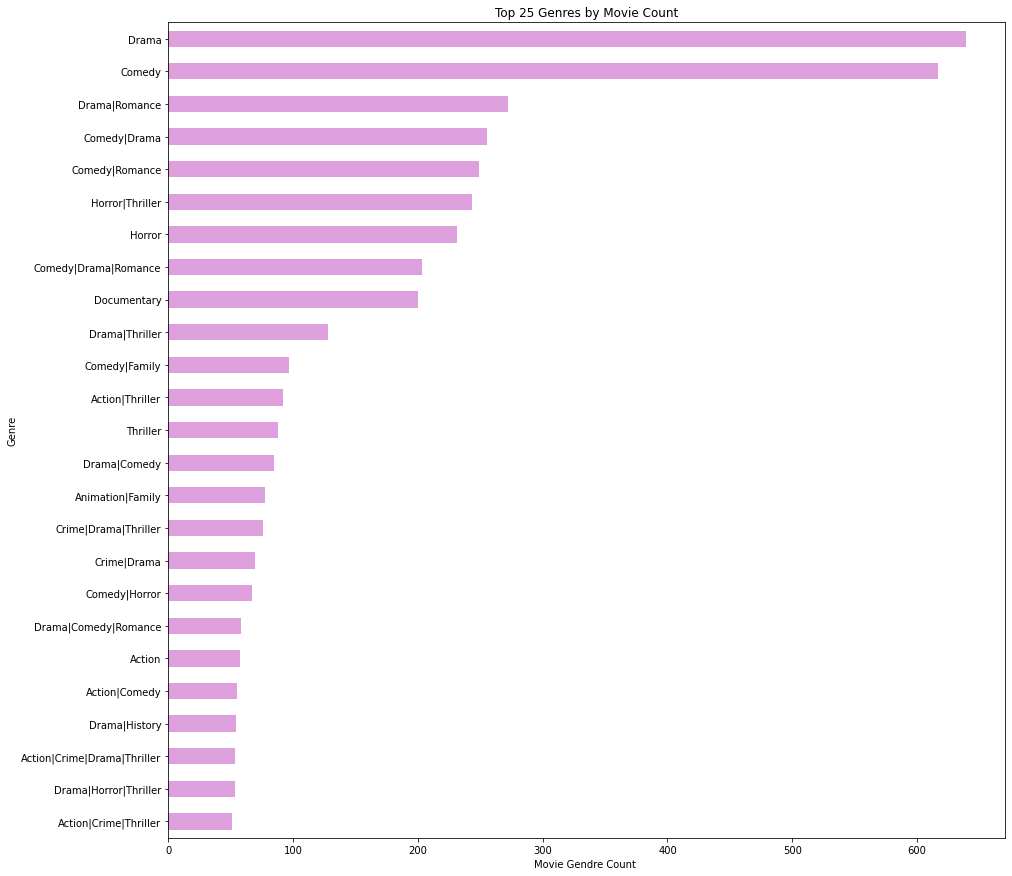

In [ ]:
# Bar Chart for top 25 directors by number of movies produced
from matplotlib import pyplot as plt
top_25_genres.sort_values(ascending=True).plot(kind='barh',figsize=(15,15),color='plum')
plt.title('Top 25 Genres by Movie Count')
plt.xlabel('Movie Gendre Count ')
plt.ylabel('Genre');

In [ ]:
# from this chart it seems that: Drama and comedy movies are the most being produced

### Research Question 2  (Number of Movies Produces By Year)

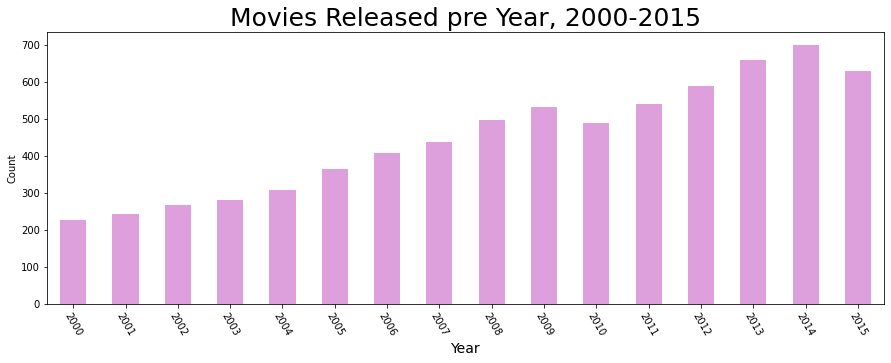

In [ ]:
# Create new function for movies from 2000 to recent
mydata_2000 = mydata.query('release_year >= 2000')

# Verify and plot number of movies released per year from 2000 to most recent
mydata_2000['release_year'].value_counts().sort_index().plot(kind='bar',figsize=(15,5),color='plum')
plt.title('Movies Released pre Year, 2000-2015',size=25)
plt.xlabel('Year',size=14)
plt.xticks(rotation=300)
plt.ylabel('Count');

####
 It's clearly obvious that Making Movies industry in progress

### Research Question 3  (IN this part i want to find relation between number of movies being produced and genres and years)
### Is there any relation between them

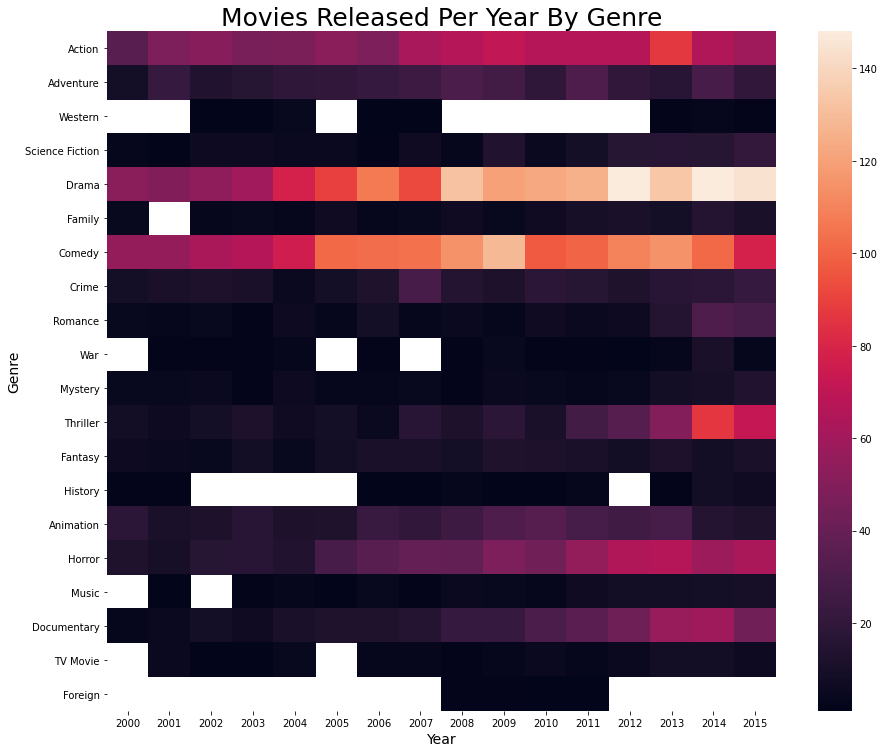

In [ ]:
# Create Heatmap of movies count by year per genre
# Group By Genre and Release Year
tmp_mydata = mydata_2000.groupby([mydata['genres'].str.split('|').str[0],'release_year'],sort=False)['release_year'].agg(['count'])
tmp_mydata.head()

heatmap_df = pd.pivot_table(tmp_mydata, values ='count',index=['genres'],columns=['release_year'])

fig, ax = plt.subplots(figsize=(15,12.5))
sns.heatmap(heatmap_df, ax=ax)
plt.xlabel('Year', size=14)
plt.ylabel('Genre',size=14)
plt.title('Movies Released Per Year By Genre',size=25);

In [ ]:
#Action, Drama, Comedy, Thriller, Horror, and Documentary genres all stand out here.

<a id='conclusions'></a>
## Conclusions
### Resukts

> **Insight(1)**: It's clearly that producers tend to produce Drama,and Comedy movies more than other genres

> **Insight(2)**: It's clearly obvious that Making Movies industry in progress and groth.

> **Insight(3)**: Action, Drama, Comedy, Thriller, Horror, and Documentary genres most genres that people love and prefer

### Limitation
> **Limitation(1)**:There are alot of Null or missing values, which may affects the samples of theeffective representation of the population.
